In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

REMOVING OUTLIERS BY IQR METHOD

In [8]:
car_df=pd.read_csv('car_dheko.csv')

In [9]:
car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number owner,oem,Car model,modelYear,centralVariantId,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age of car
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,23.10,998,67.04,90.00,5.0,9
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,17.00,1497,121.31,150.00,5.0,6
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,23.84,1199,84.00,114.00,5.0,6
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,19.10,1197,81.86,113.75,5.0,10
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,23.65,1248,88.50,200.00,5.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,42891,Automatic,1,Maruti,Maruti Swift,2018,6190,AMT VXI,620000.0,22.00,1197,81.80,113.00,5.0,6
8365,Diesel,SUV,59100,Manual,1,Renault,Renault Duster,2018,5050,85PS Diesel RxZ,890000.0,19.87,1461,83.80,200.00,5.0,6
8366,Petrol,SUV,55913,Automatic,1,Tata,Tata Nexon,2018,6364,1.2 Revotron XZA Plus,801000.0,17.00,1198,108.50,170.00,5.0,6
8367,Diesel,SUV,65000,Automatic,1,Volkswagen,Volkswagen Tiguan,2017,5849,2.0 TDI Highline,2050000.0,16.65,1968,141.00,340.00,5.0,7


In [6]:
def outlier(car_df, column):
    iqr = car_df[column].quantile(0.75) - car_df[column].quantile(0.25)
    upper_value = car_df[column].quantile(0.75) + (1.5*iqr)
    lower_value = car_df[column].quantile(0.25) - (1.5*iqr)
    car_df[column] = car_df[column].clip(lower_value, upper_value)
    
outlier(car_df, 'Mileage_km')
outlier(car_df, 'price')
outlier(car_df, 'Mileage')
outlier(car_df, 'Engine')
outlier(car_df, 'Max Power')
outlier(car_df, 'Torque')

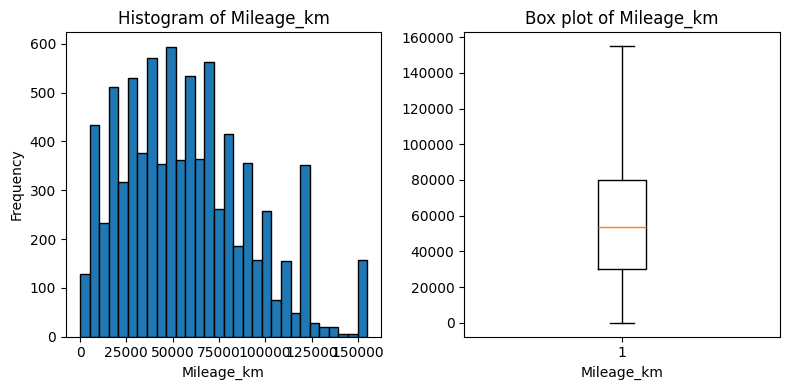

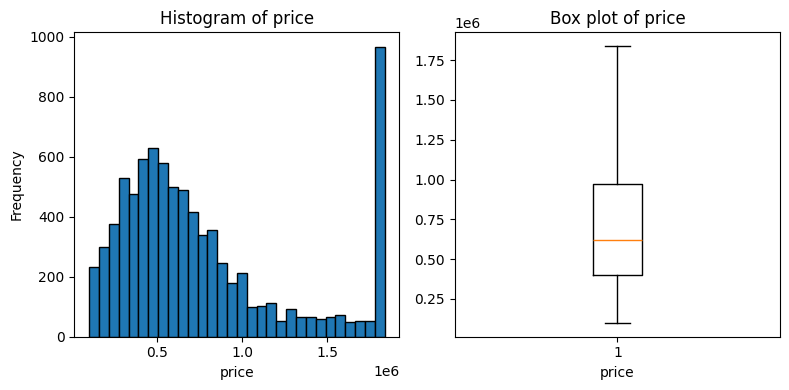

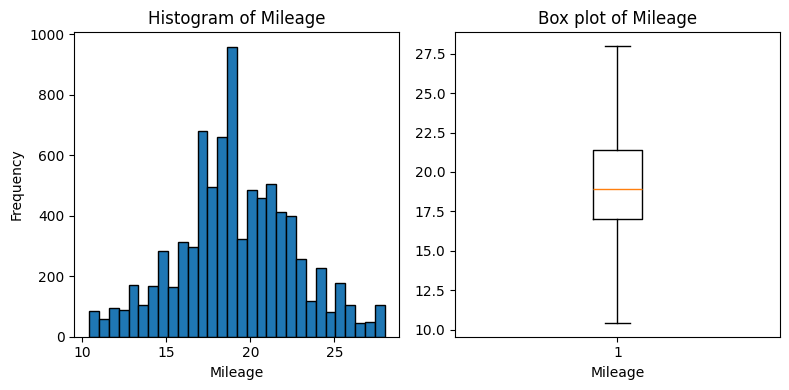

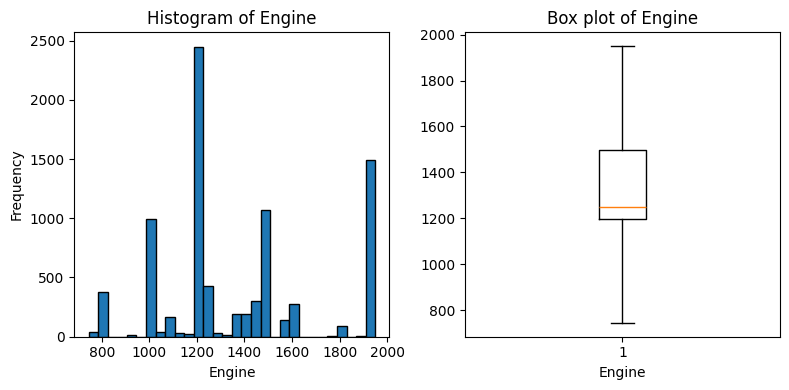

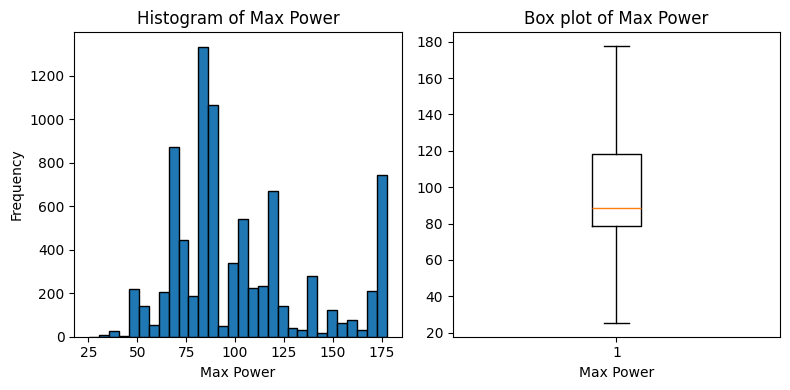

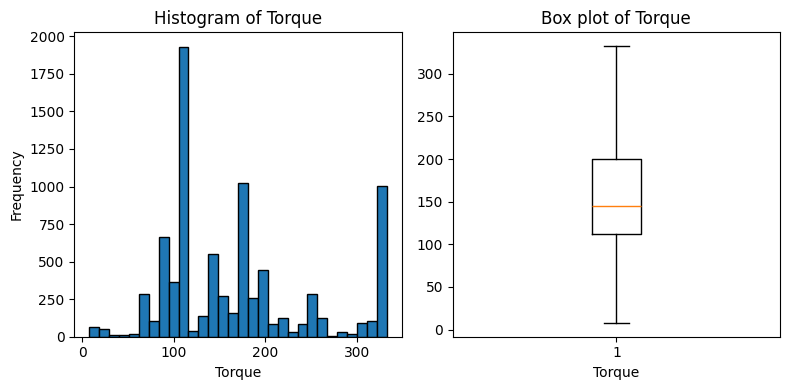

In [7]:
for i in ['Mileage_km', 'price', 'Mileage', 'Engine', 'Max Power', 'Torque']:
    plt.figure(figsize=(8, 4)) 

    plt.subplot(1, 2, 2)
    plt.boxplot(car_df[i].dropna())  
    plt.title(f"Box plot of {i}")
    plt.xlabel(i)

    plt.subplot(1, 2, 1)  
    plt.hist(car_df[i].dropna(), bins=30, edgecolor='k') 
    plt.title(f"Histogram of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")

    plt.tight_layout()  
    plt.show()

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

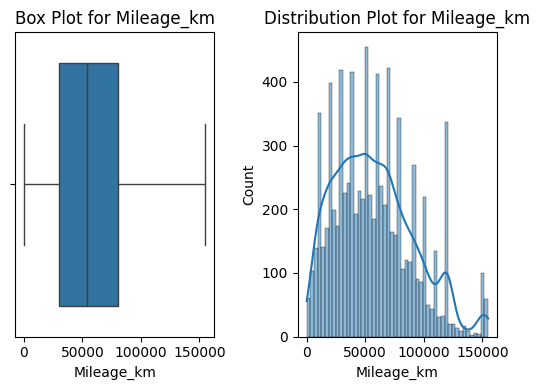

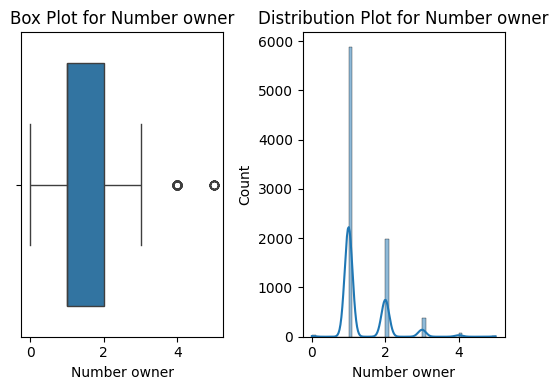

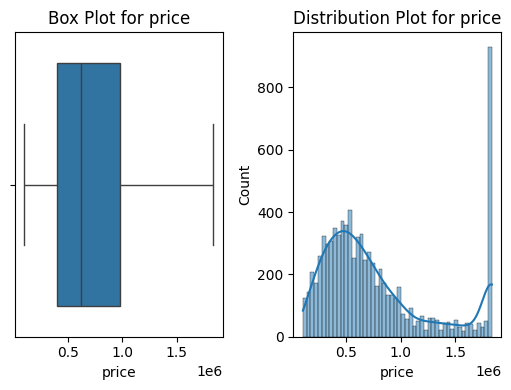

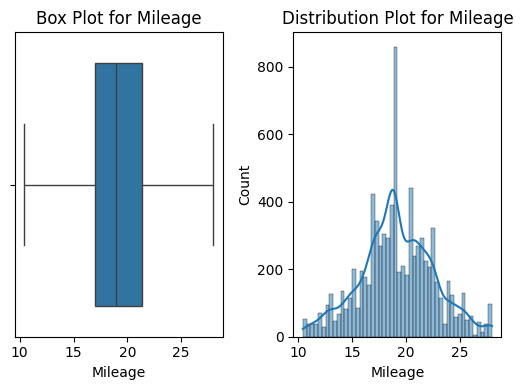

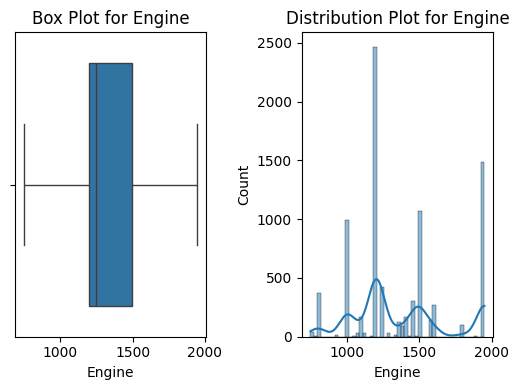

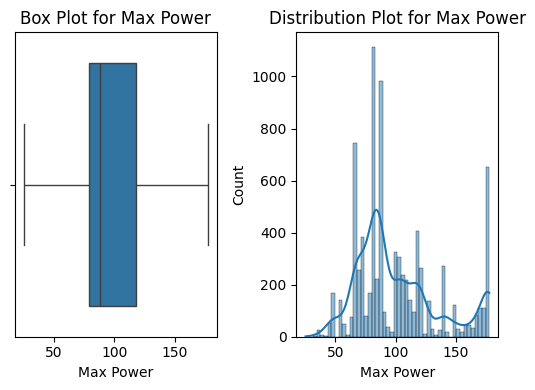

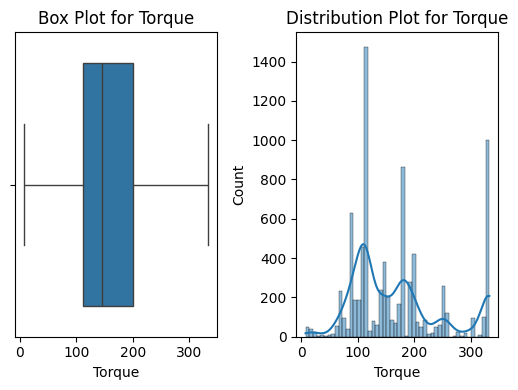

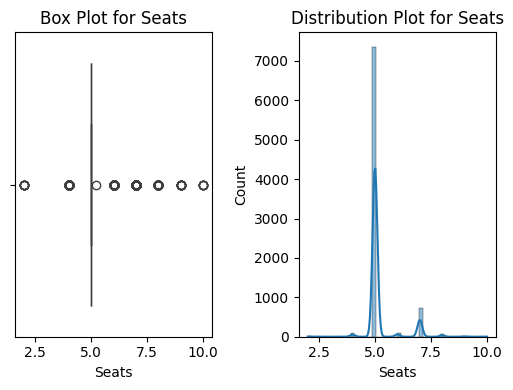

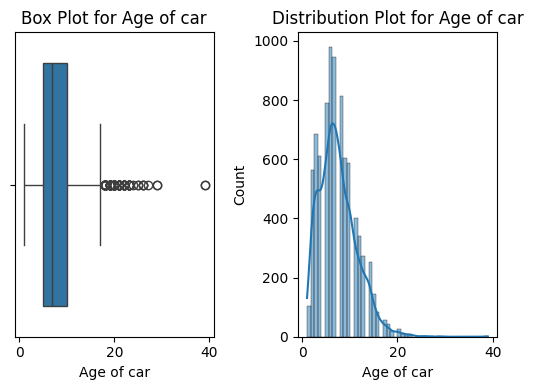

In [8]:
def plot(car_df, column):
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=car_df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1, 3, 2)
    sns.histplot(data=car_df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.tight_layout()
    plt.show()
    
for i in ['Mileage_km', 'Number owner', 'price', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats', 'Age of car']:
    plot(car_df, i)

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\1155211347.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


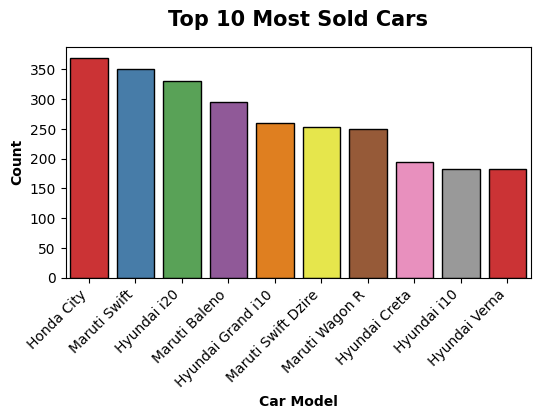

In [9]:
top_10_models = car_df['Car model'].value_counts().nlargest(10).index

plt.figure(figsize=(6, 3)) 
sns.countplot(
    x="Car model", 
    data=car_df[car_df['Car model'].isin(top_10_models)],  
    ec="black", 
    palette="Set1", 
    order=top_10_models
)
plt.title("Top 10 Most Sold Cars", weight="bold", fontsize=15, pad=15)
plt.ylabel("Count", weight="bold", fontsize=10)
plt.xlabel("Car Model", weight="bold", fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.show()

Honda City is the top most sold cars based on Car models

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\3254603475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


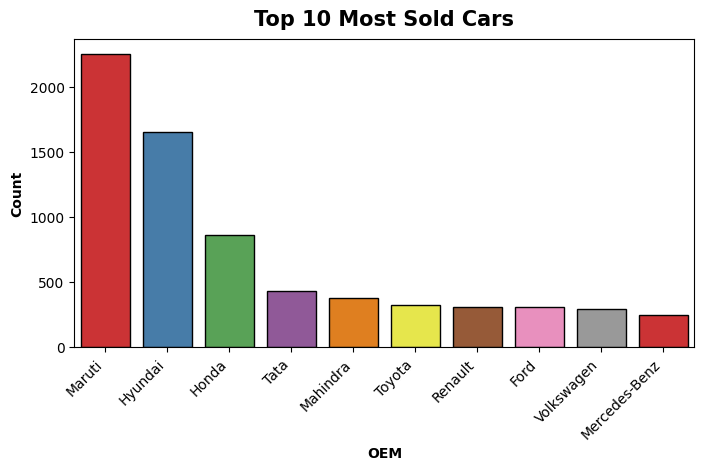

In [10]:
top_10_oems = car_df['oem'].value_counts().nlargest(10).index

plt.figure(figsize=(8, 4)) 
sns.countplot(
    x="oem", 
    data=car_df[car_df['oem'].isin(top_10_oems)], 
    ec="black", 
    palette="Set1", 
    order=top_10_oems
)
plt.title("Top 10 Most Sold Cars", weight="bold", fontsize=15, pad=10)
plt.ylabel("Count", weight="bold", fontsize=10)
plt.xlabel("OEM", weight="bold", fontsize=10)  
plt.xticks(rotation=45, ha="right")
plt.show()

Maruti is the top most sold cars based on oem(Original Equipment Manufacturer)

BIVARIATE ANALYSIS

In [11]:
car_df

,Fuel_Type,Body_Type,Mileage_km,Transmission type,Number owner,oem,Car model,modelYear,centralVariantId,variantName,price,Mileage,Engine,Max Power,Torque,Seats,Age of car
0,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,23.10,998.0,67.04,90.00,5.0,9
1,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,17.00,1497.0,121.31,150.00,5.0,6
2,Petrol,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,23.84,1199.0,84.00,114.00,5.0,6
3,Petrol,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,19.10,1197.0,81.86,113.75,5.0,10
4,Diesel,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,23.65,1248.0,88.50,200.00,5.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,42891,Automatic,1,Maruti,Maruti Swift,2018,6190,AMT VXI,620000.0,22.00,1197.0,81.80,113.00,5.0,6
8365,Diesel,SUV,59100,Manual,1,Renault,Renault Duster,2018,5050,85PS Diesel RxZ,890000.0,19.87,1461.0,83.80,200.00,5.0,6
8366,Petrol,SUV,55913,Automatic,1,Tata,Tata Nexon,2018,6364,1.2 Revotron XZA Plus,801000.0,17.00,1198.0,108.50,170.00,5.0,6
8367,Diesel,SUV,65000,Automatic,1,Volkswagen,Volkswagen Tiguan,2017,5849,2.0 TDI Highline,1837500.0,16.65,1949.5,141.00,332.45,5.0,7


In [12]:
brand_sales = car_df.groupby('Car model').agg(
    sales_count=('Car model', 'size'),    
    avg_price=('price', 'mean')  
)
top_selling_brands = brand_sales.sort_values('sales_count', ascending=False).head(10)
top_selling_brands

,sales_count,avg_price
Car model,,
Honda City,370,6.983108e+05
Maruti Swift,350,5.097186e+05
Hyundai i20,331,5.626616e+05
Maruti Baleno,295,6.442644e+05
Hyundai Grand i10,260,4.717885e+05
Maruti Swift Dzire,253,5.205692e+05
Maruti Wagon R,250,4.308280e+05
Hyundai Creta,194,1.095304e+06
Hyundai i10,183,2.803798e+05


C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\1595401805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


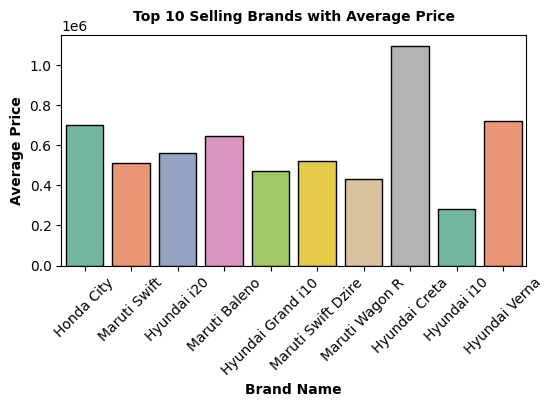

In [14]:
plt.figure(figsize=(6, 3))
sns.barplot(
    x=top_selling_brands.index, 
    y=top_selling_brands['avg_price'], 
    palette="Set2", 
    edgecolor="black"
)
plt.title("Top 10 Selling Brands with Average Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Average Price", weight="bold", fontsize=10)
plt.xlabel("Brand Name", weight="bold", fontsize=10)
plt.xticks(rotation=45)
plt.show()

Hyundai Creta are the most sold brand based on average price

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\447924682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Fuel_Type',y = 'price',data =car_df,ec = "black",palette="Set1")


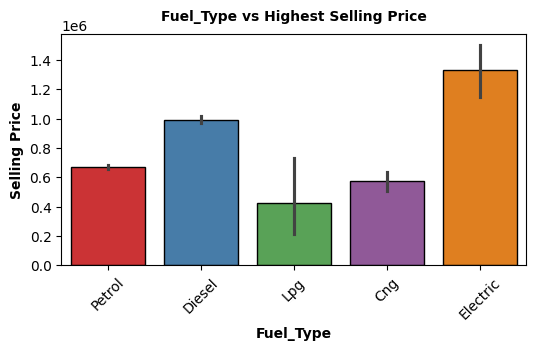

In [15]:
plt.figure(figsize= (6,3))
sns.barplot(x= 'Fuel_Type',y = 'price',data =car_df,ec = "black",palette="Set1")
plt.title("Fuel_Type vs Highest Selling Price", weight="bold",fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Fuel_Type", weight="bold", fontsize=10)
plt.xticks(rotation=45)
plt.show()


Electric cars are sold mostly based on selling price

In [16]:
fuel_mileage = car_df.groupby('Fuel_Type')['Mileage'].mean().sort_values(ascending=False).to_frame()
fuel_mileage

,Mileage
Fuel_Type,
Cng,22.404745
Electric,19.538214
Diesel,19.397830
Petrol,19.007838
Lpg,16.856402


C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\2636233453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type', y='Mileage', data=car_df,palette="Set1_r")


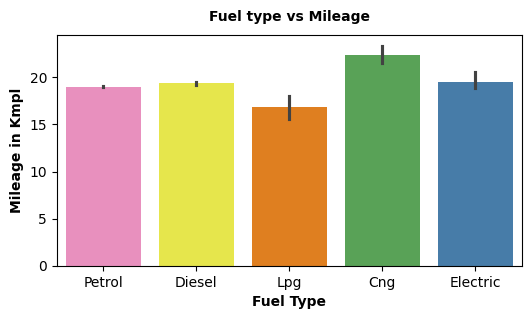

In [17]:
plt.subplots(figsize=(6,3))
sns.barplot(x='Fuel_Type', y='Mileage', data=car_df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=10, pad=10)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=10)
plt.xlabel("Fuel Type", weight="bold", fontsize=10)
plt.show()


Cng based cars are sold mostly based on mileage_kmpl

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\1446695583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Body_Type',y= 'price',data =car_df,ec = "black",palette="Set1")


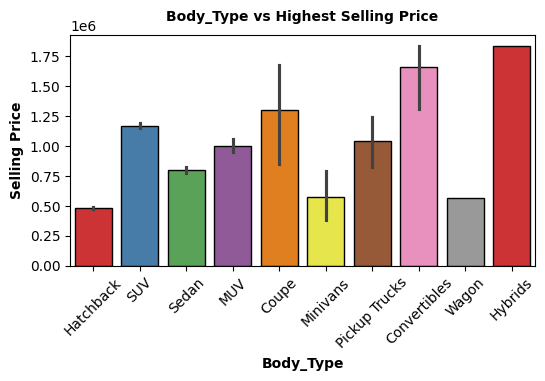

In [18]:
plt.figure(figsize= (6,3))
sns.barplot(x= 'Body_Type',y= 'price',data =car_df,ec = "black",palette="Set1")
plt.title("Body_Type vs Highest Selling Price", weight="bold",fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Body_Type", weight="bold", fontsize=10)
plt.xticks(rotation=45)
plt.show()

Hybrids Body type are mostly sold based on selling price

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\1375177512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Transmission type',y= 'price',data = car_df,ec = "black",palette="Set1")


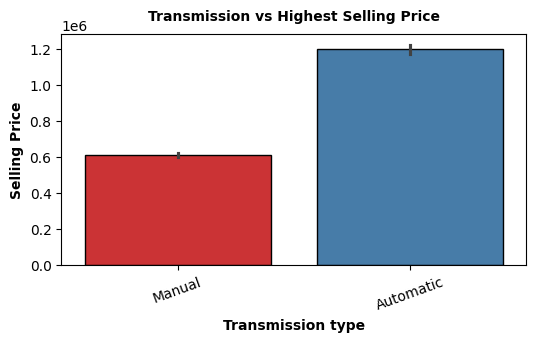

In [19]:
plt.figure(figsize= (6,3))
sns.barplot(x= 'Transmission type',y= 'price',data = car_df,ec = "black",palette="Set1")
plt.title("Transmission vs Highest Selling Price", weight="bold",fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Transmission type", weight="bold", fontsize=10)
plt.xticks(rotation=20)
plt.show()


Automatic transmission type are mostly sold based on selling price

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\3204662748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mileage', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Mileage'].value_counts().index[:10])


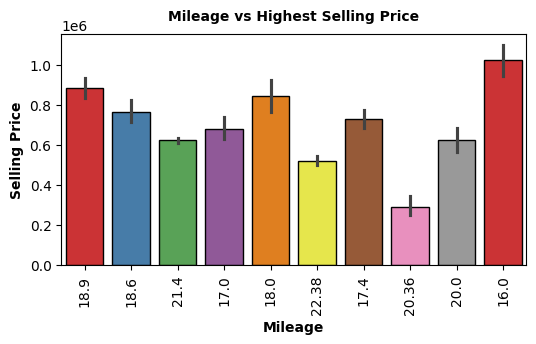

In [20]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Mileage', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Mileage'].value_counts().index[:10])
plt.title("Mileage vs Highest Selling Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Mileage", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\303041190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mileage_km', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Mileage_km'].value_counts().index[:10])


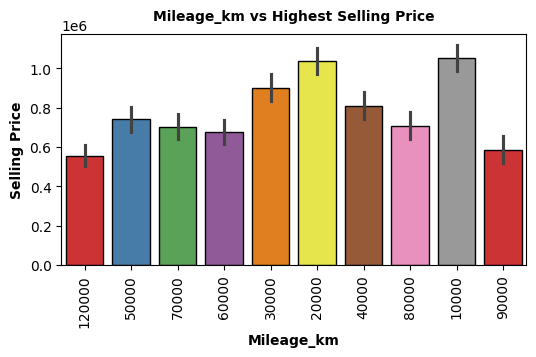

In [21]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Mileage_km', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Mileage_km'].value_counts().index[:10])
plt.title("Mileage_km vs Highest Selling Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Mileage_km", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_14608\1243186801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number owner', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Number owner'].value_counts().index[:10])


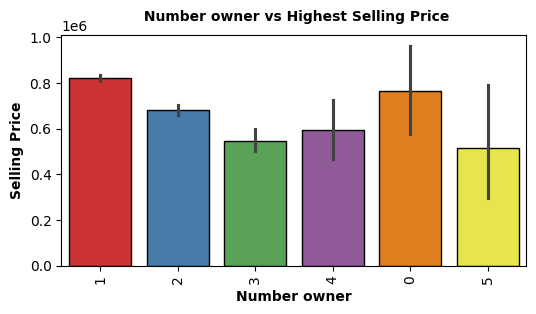

In [127]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Number owner', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Number owner'].value_counts().index[:10])
plt.title(" Number owner vs Highest Selling Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Number owner", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()


C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\2999945548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age of car', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Age of car'].value_counts().index[:10])


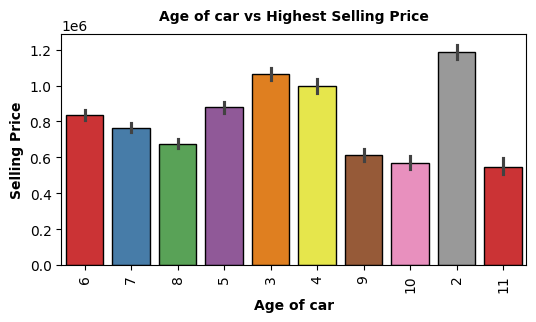

In [23]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Age of car', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Age of car'].value_counts().index[:10])
plt.title("Age of car vs Highest Selling Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Age of car", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\2512677301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Engine', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Engine'].value_counts().index[:10])


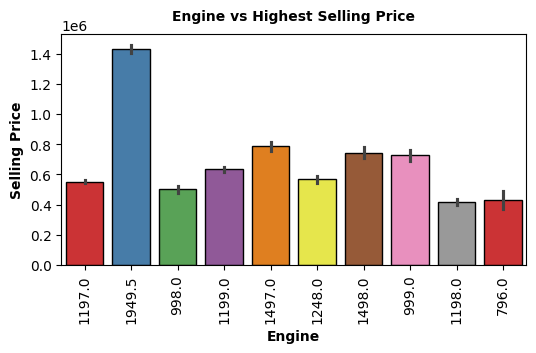

In [24]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Engine', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Engine'].value_counts().index[:10])
plt.title("Engine vs Highest Selling Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Engine", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()


C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_14608\383227509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Max Power', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Max Power'].value_counts().index[:10])


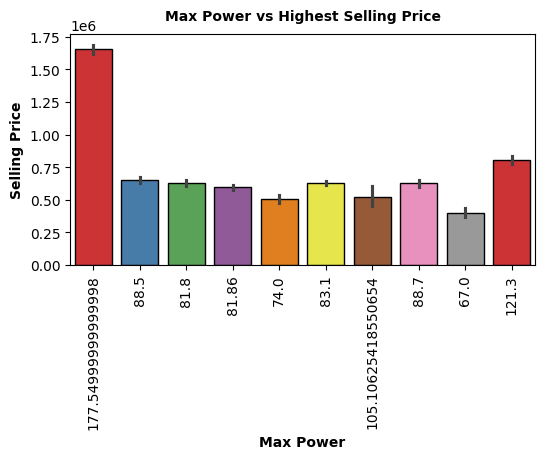

In [139]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Max Power', y='price', data=car_df, ec="black", palette="Set1", order=car_df['Max Power'].value_counts().index[:10])
plt.title("Max Power vs Highest Selling Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Max Power", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\1717644763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='oem', y='Mileage', data=car_df, ec="black", palette="Set1", order=car_df['oem'].value_counts().index[:10])


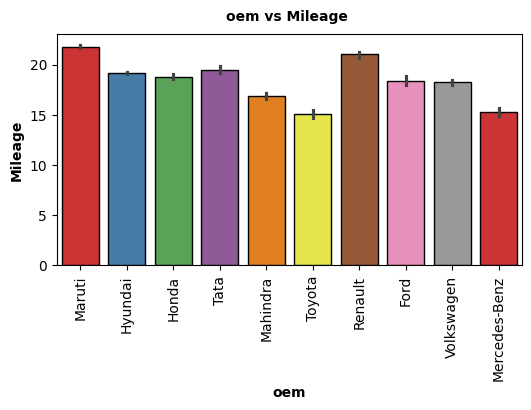

In [25]:
plt.figure(figsize=(6, 3))
sns.barplot(x='oem', y='Mileage', data=car_df, ec="black", palette="Set1", order=car_df['oem'].value_counts().index[:10])
plt.title("oem vs Mileage ", weight="bold", fontsize=10, pad=10)
plt.ylabel("Mileage", weight="bold", fontsize=10)
plt.xlabel("oem", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()


Maruti brands giving highest mileage based on oem (Original Equipment Manufacturer)

C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_8956\4229852032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Car model', y='Mileage', data=car_df, ec="black", palette="Set1", order=car_df['Car model'].value_counts().index[:10])


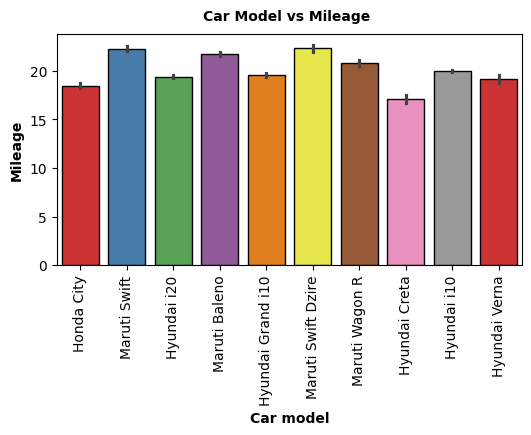

In [26]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Car model', y='Mileage', data=car_df, ec="black", palette="Set1", order=car_df['Car model'].value_counts().index[:10])
plt.title("Car Model vs Mileage ", weight="bold", fontsize=10, pad=10)
plt.ylabel("Mileage", weight="bold", fontsize=10)
plt.xlabel("Car model", weight="bold", fontsize=10)
plt.xticks(rotation=90)
plt.show()

Maruti swift car models giving highest mileage

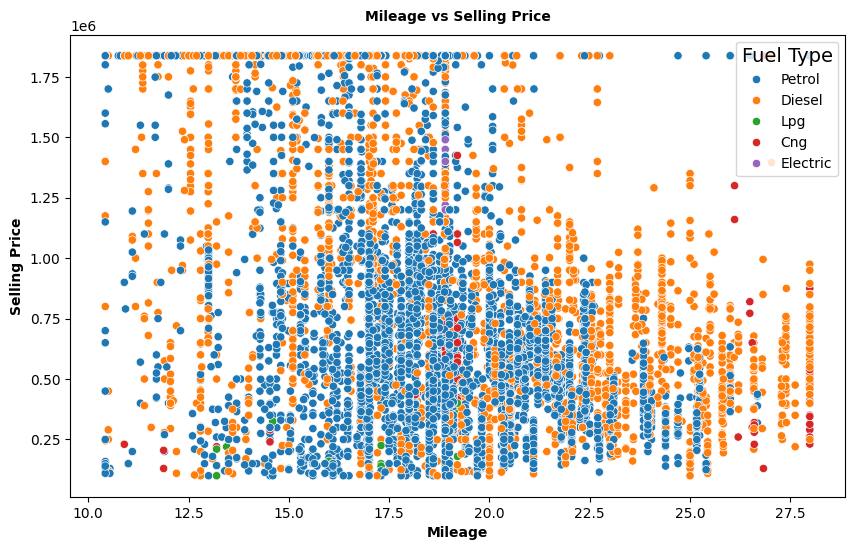

In [12]:
plt.subplots(figsize=(10, 6))
sns.scatterplot(x="Mileage", y='price', data=car_df, ec="white", color='b', hue='Fuel_Type')
plt.title("Mileage vs Selling Price", weight="bold", fontsize=10, pad=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.xlabel("Mileage", weight="bold", fontsize=10)
plt.legend(title='Fuel Type', title_fontsize='14', loc='upper right') 
plt.show()

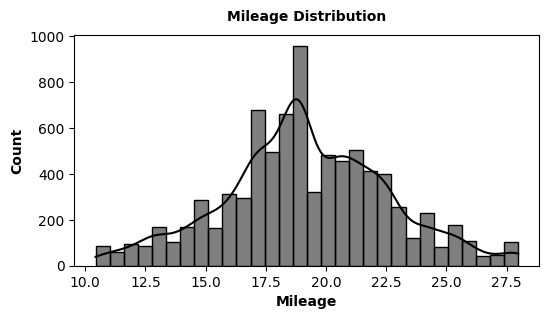

In [152]:
plt.subplots(figsize=(6, 3))
sns.histplot(x=car_df['Mileage'], bins=30, color='black', kde=True, edgecolor="black")
plt.title("Mileage Distribution", weight="bold", fontsize=10, pad=10)
plt.ylabel("Count", weight="bold", fontsize=10)
plt.xlabel("Mileage", weight="bold", fontsize=10)
plt.show()

TARGET FEATURE DISTRIBUTION

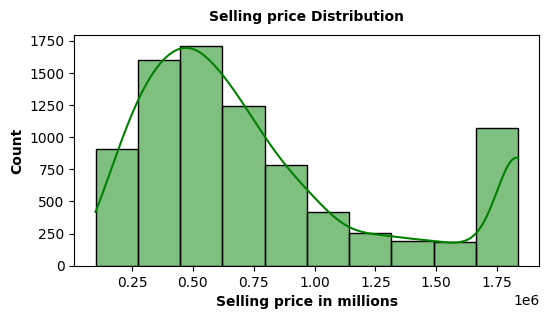

In [154]:
plt.subplots(figsize=(6, 3))
sns.histplot(x=car_df['price'], bins=10, color='g', kde=True, edgecolor="black")
plt.title("Selling price Distribution", weight="bold", fontsize=10, pad=10)
plt.ylabel("Count", weight="bold", fontsize=10)
plt.xlabel("Selling price in millions", weight="bold", fontsize=10)
plt.show()


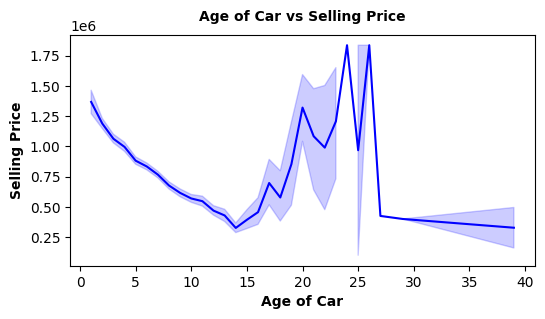

In [156]:
plt.subplots(figsize=(6, 3))
sns.lineplot(x='Age of car', y='price', data=car_df, color='b')
plt.title("Age of Car vs Selling Price", weight="bold", fontsize=10, pad=10)
plt.xlabel("Age of Car", weight="bold", fontsize=10)
plt.ylabel("Selling Price", weight="bold", fontsize=10)
plt.show()


C:\Users\Kiruthika Karthikeya\AppData\Local\Temp\ipykernel_14608\3649870182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age of car', y= 'Mileage',data =car_df , palette="Set1",order =car_df['Age of car'].value_counts().index[:10] )


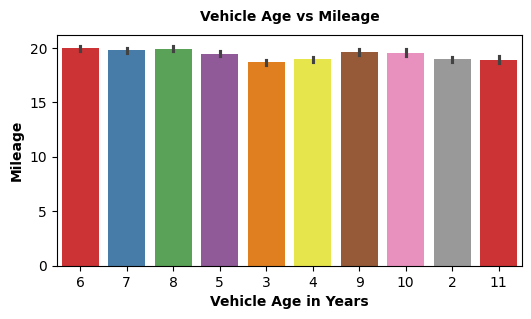

In [159]:
plt.subplots(figsize=(6,3))
sns.barplot(x='Age of car', y= 'Mileage',data =car_df , palette="Set1",order =car_df['Age of car'].value_counts().index[:10] )
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=10, pad=10)
plt.ylabel("Mileage", weight="bold", fontsize=10)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=10)
plt.show()

MULTIVARIATE ANALYSIS

In [6]:
carprice_df=pd.read_csv('car_price.csv')
carprice_df

,Mileage_km,Number owner,price,Mileage,Engine,Max Power,Torque,Seats,Age of car,Body_Type_numeric,Fuel_Type_numeric,Transmission_numeric
0,120000,3,400000,23,998,67,90,5,9,0,0,0
1,32706,2,811000,17,1497,121,150,5,6,1,0,0
2,11949,1,585000,23,1199,84,114,5,6,0,0,0
3,17794,1,462000,19,1197,81,113,5,10,2,0,0
4,60000,1,790000,23,1248,88,200,5,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,42891,1,620000,22,1197,81,113,5,6,0,0,1
8365,59100,1,890000,19,1461,83,200,5,6,1,1,0
8366,55913,1,801000,17,1198,108,170,5,6,1,0,1
8367,65000,1,2050000,16,1968,141,340,5,7,1,1,1


In [9]:
numerical_features = [feature for feature in carprice_df.columns if carprice_df[feature].dtype != 'O']

In [10]:
numerical_features 

['Mileage_km',
 'Number owner',
 'price',
 'Mileage',
 'Engine',
 'Max Power',
 'Torque',
 'Seats',
 'Age of car',
 'Body_Type_numeric',
 'Fuel_Type_numeric',
 'Transmission_numeric']

In [11]:
car_corr = carprice_df[numerical_features].corr()
car_corr

,Mileage_km,Number owner,price,Mileage,Engine,Max Power,Torque,Seats,Age of car,Body_Type_numeric,Fuel_Type_numeric,Transmission_numeric
Mileage_km,1.000000,0.115419,0.037923,-0.008581,0.091089,-0.008292,0.049657,0.074924,0.245030,0.053188,0.141545,-0.065439
Number owner,0.115419,1.000000,0.129965,-0.074859,0.053909,-0.025286,-0.024557,0.010594,0.390012,0.002239,0.033291,-0.046777
price,0.037923,0.129965,1.000000,-0.042403,-0.070744,-0.077508,-0.087854,-0.041128,0.288251,-0.041215,-0.032047,-0.066431
Mileage,-0.008581,-0.074859,-0.042403,1.000000,-0.537398,-0.511213,-0.337557,-0.296443,-0.111790,-0.278834,0.105932,-0.249318
Engine,0.091089,0.053909,-0.070744,-0.537398,1.000000,0.810893,0.764816,0.414215,0.043533,0.446697,0.352380,0.352283
Max Power,-0.008292,-0.025286,-0.077508,-0.511213,0.810893,1.000000,0.816319,0.166323,-0.133226,0.407161,0.238200,0.510099
Torque,0.049657,-0.024557,-0.087854,-0.337557,0.764816,0.816319,1.000000,0.261046,-0.126149,0.319154,0.500743,0.418362
Seats,0.074924,0.010594,-0.041128,-0.296443,0.414215,0.166323,0.261046,1.000000,-0.005254,0.280998,0.249540,-0.008312
Age of car,0.245030,0.390012,0.288251,-0.111790,0.043533,-0.133226,-0.126149,-0.005254,1.000000,-0.026758,0.040004,-0.196946
Body_Type_numeric,0.053188,0.002239,-0.041215,-0.278834,0.446697,0.407161,0.319154,0.280998,-0.026758,1.000000,0.191884,0.174274


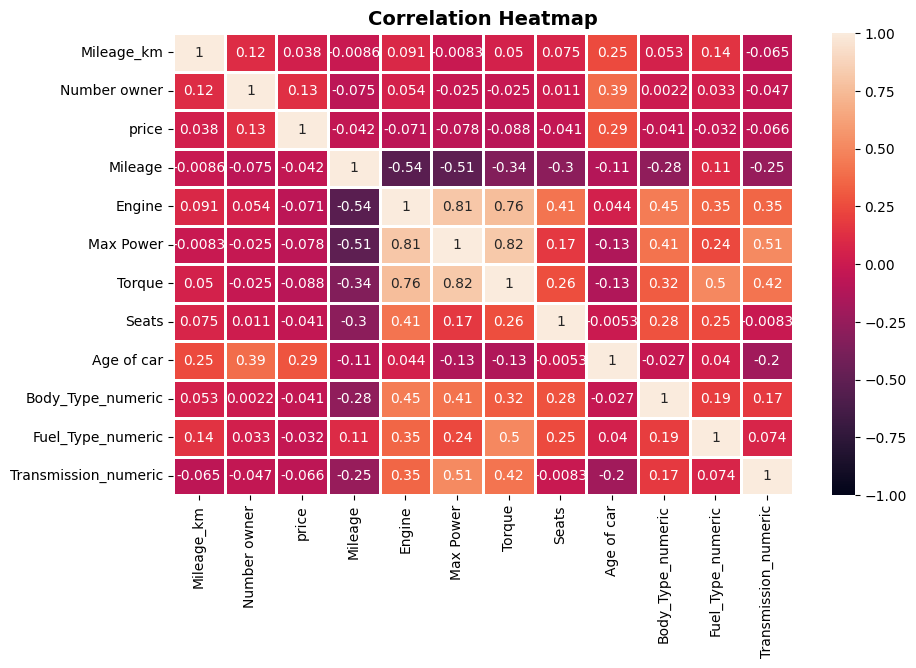

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(car_corr, annot=True, vmin=-1, vmax=1, linecolor='white', linewidths=2)
plt.title("Correlation Heatmap", weight="bold", fontsize=14)
plt.show()